In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support


In [ ]:
df = pd.read_csv('/content/Career_Switch_Prediction_Dataset.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [ ]:
print(f"There are {df.shape[1]} features in the dataset")

print("Binary classification problem. Beacuse we are predicting two labels from the features")

print(f"There are {df.size} data points")

print(set(df.dtypes))                                                         #catagorical = object

There are 14 features in the dataset
Binary classification problem. Beacuse we are predicting two labels from the features
There are 70000 data points
{dtype('int64'), dtype('float64'), dtype('O')}


In [ ]:
len(df)

5000

For the output feature, do all unique classes have an equal number of instances or not?


In [ ]:
df['will_change_career'].value_counts()

,count
will_change_career,
0,3738
1,1262


-Represent using a bar chart of N classes (N=number of classes you have in your dataset).

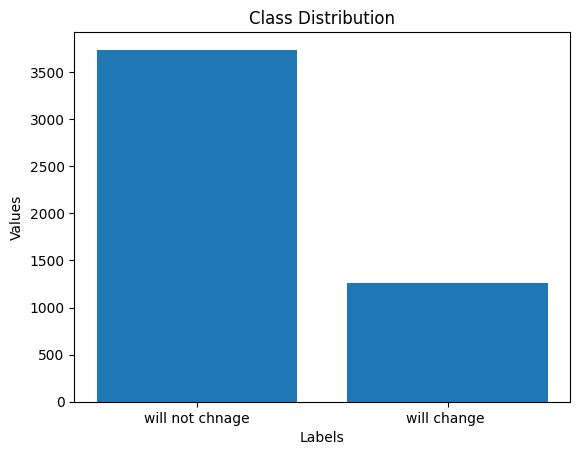

In [ ]:
labels = ['will not chnage' ,'will change ']
values = [3738, 1262]

plt.bar(labels, values)
plt.xlabel("Labels")
plt.ylabel("Values")
plt.title("Class Distribution")
plt.show()

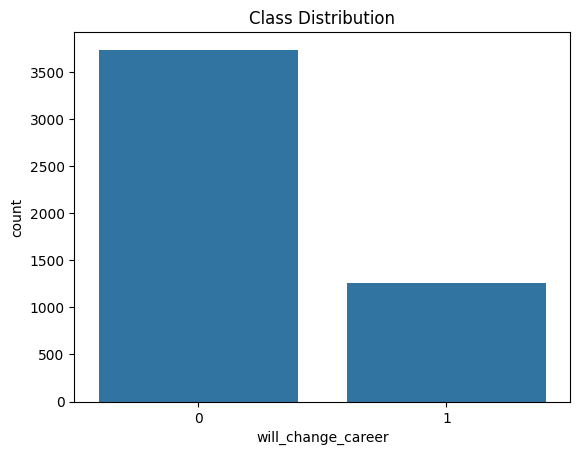

In [ ]:
sns.countplot(x = 'will_change_career', data = df)
plt.title('Class Distribution')
plt.show()


Categorical Features: ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


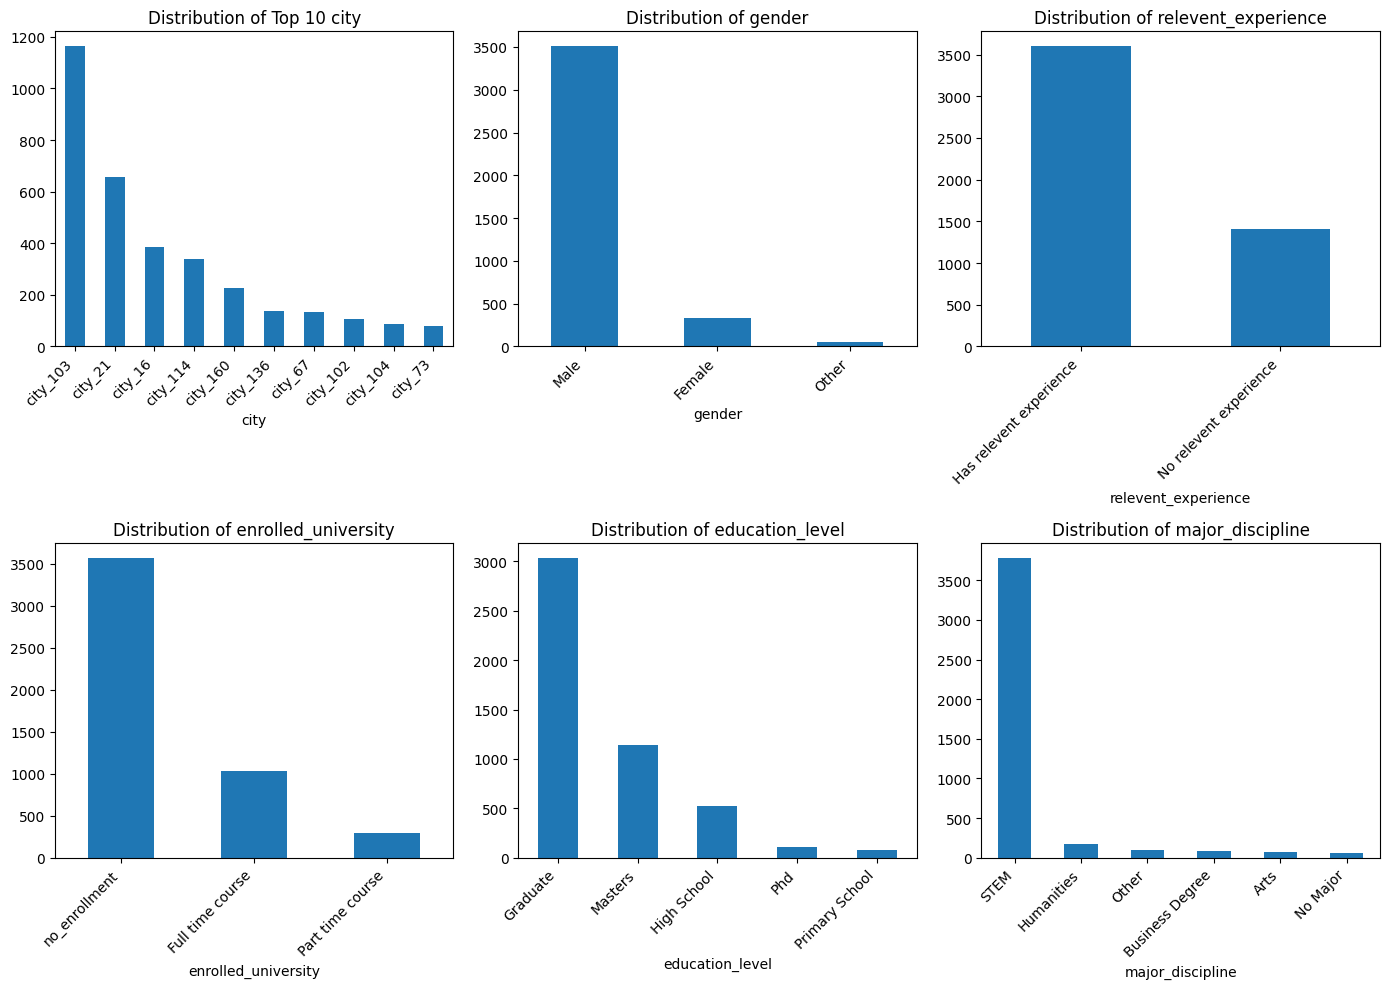

In [ ]:
cat_features = df.select_dtypes(include=['object']).columns
print("\nCategorical Features:", cat_features.tolist())

# Plot distribution of major categorical features
plt.figure(figsize=(14, 10))

for i, feature in enumerate(cat_features[:min(6, len(cat_features))]):
    plt.subplot(2, 3, i+1)

    if feature == 'city':
        # Plot only the top 10 most frequent cities
        top_cities = df['city'].value_counts().nlargest(10).index
        df[df['city'].isin(top_cities)]['city'].value_counts().plot(kind='bar')
        plt.title(f'Distribution of Top 10 {feature}')
        plt.xticks(rotation=45, ha='right')
    else:
        df[feature].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Numerical Features: ['enrollee_id', 'city_development_index', 'training_hours', 'will_change_career']


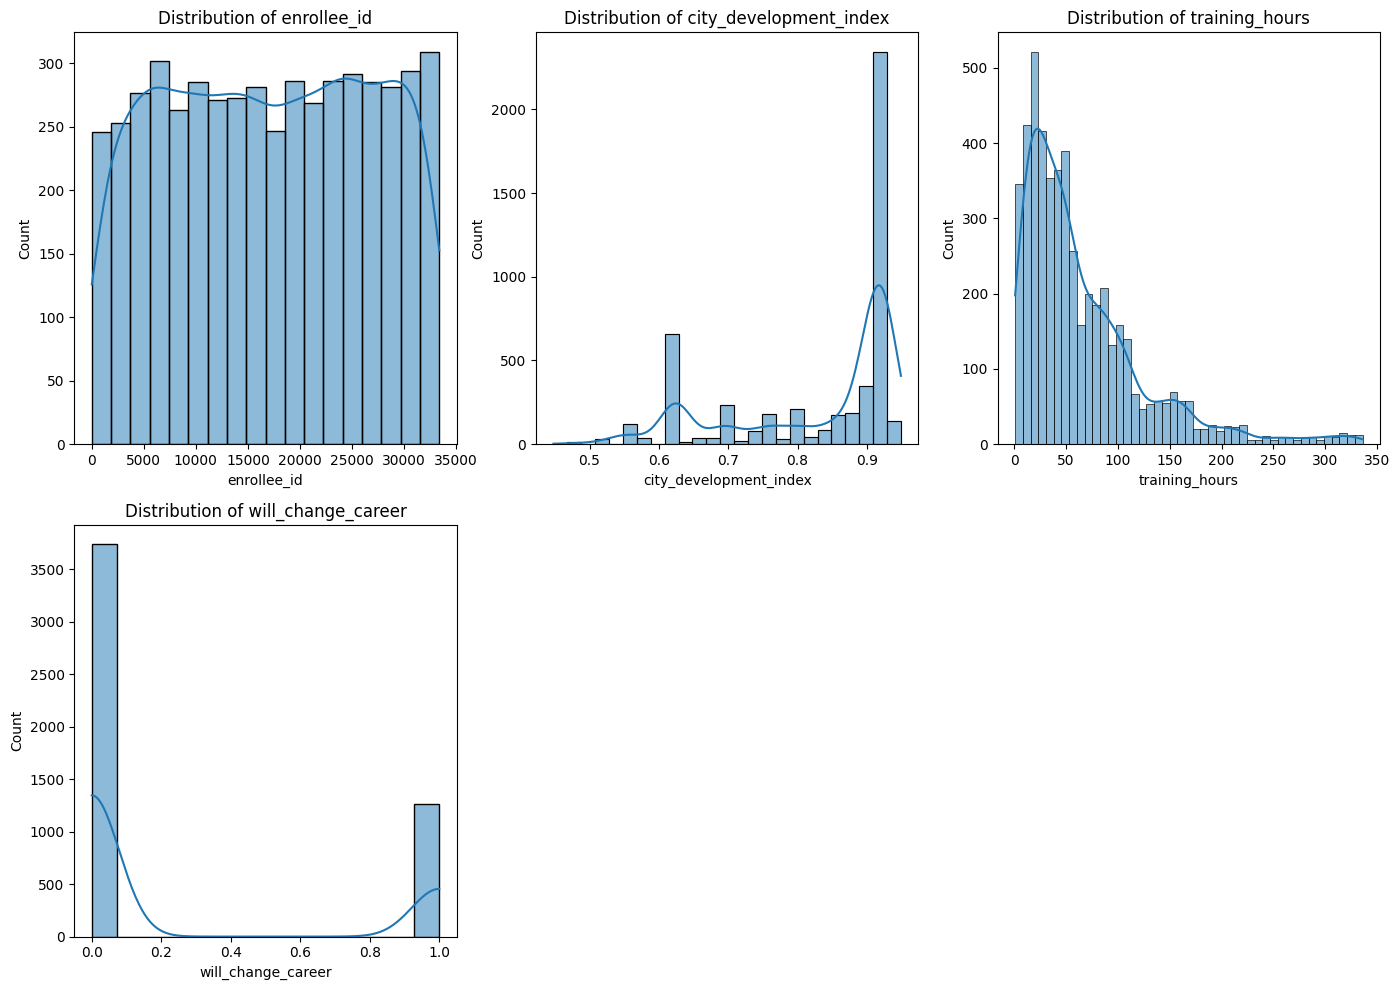

In [ ]:

# Explore numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Features:", num_features.tolist())

# Plot distribution of major numerical features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(num_features[:min(6, len(num_features))]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


**Correlation**

In [ ]:
# # Assuming 'df' is your DataFrame
# for column in df.select_dtypes(include=['object']).columns:
#   df[column] = pd.factorize(df[column])[0]  # Use factorize for encoding
#        # Alternatively, use Label Encoding as mentioned in your code
#        # df[column] = LabelEncoder().fit_transform(df[column])

# numeric_df = df.select_dtypes(include=['int64', 'float64'])  # Update numeric_df
# plt.figure(figsize=(12, 10))
# correlation_matrix = numeric_df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()

# **3**

# **dataset processing**

In [ ]:
#null vals and cat vals
print(df.isna().sum())

print("-----")

non_numeric_cols = df.select_dtypes(exclude='number').columns.tolist()
print(non_numeric_cols)

enrollee_id                  0
city                         0
city_development_index       0
gender                    1113
relevent_experience          0
enrolled_university        107
education_level            118
major_discipline           724
experience                  11
company_size              1571
company_type              1621
last_new_job               104
training_hours               0
will_change_career           0
dtype: int64
-----
['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


# **Dealing with null values**

In [ ]:
len(df)

5000

In [ ]:
null_rows = df.isnull().any(axis=1).sum()
print(null_rows)

2609


In [ ]:
null_cols = df.columns[df.isna().any()].tolist()
print(null_cols)

['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [ ]:
for col in null_cols:
    if df[col].dtype == df['gender'].dtype: # datatype == categorical= mode
        mode = df[col].mode()[0]
        df[col] = df[col].fillna(mode)
    else :             # datatype == numeric = median
        df[col] = df[col].fillna(df[col].median())


In [ ]:
df.isna().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,0
relevent_experience,0
enrolled_university,0
education_level,0
major_discipline,0
experience,0
company_size,0


# **Dealing with cat values**

In [ ]:
print(non_numeric_cols)

['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for cat_col in non_numeric_cols:
  df[cat_col] = le.fit_transform(df[cat_col])


In [ ]:
df.dtypes

,0
enrollee_id,int64
city,int64
city_development_index,float64
gender,int64
relevent_experience,int64
enrolled_university,int64
education_level,int64
major_discipline,int64
experience,int64
company_size,int64


In [ ]:
df['will_change_career'] = df['will_change_career'].astype('int64')

# **Feature Scalling**

In [ ]:
for col in df.columns.to_list():
  col_var = np.var(df[col])
  print(f'{col}: {round(col_var,2)}')


enrollee_id: 93238412.69
city: 1031.76
city_development_index: 0.01
gender: 0.07
relevent_experience: 0.2
enrolled_university: 0.66
education_level: 0.99
major_discipline: 0.92
experience: 43.01
company_size: 3.54
company_type: 1.71
last_new_job: 2.76
training_hours: 3592.89
will_change_career: 0.19


In [ ]:
y = [0,1]
std = np.std(y)         #standerd daviation
mean = np.mean(y)

print((0-mean)/std)
print((1-mean)/std)

-1.0
1.0


In [ ]:
features = df.drop('will_change_career',axis=1).columns.to_list()
print(features)

['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']


In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
0,8949,5,0.920,1,0,2,0,5,21,3,5,1,36,1
1,29725,68,0.776,1,1,2,0,5,6,3,5,5,47,0
2,11561,56,0.624,1,1,0,0,5,15,3,5,0,83,0
3,33241,13,0.789,1,1,2,0,1,20,3,5,0,52,1
4,666,46,0.767,1,0,2,2,5,21,3,1,4,8,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
0,-0.836152,-1.069737,0.740009,0.205914,-0.624228,0.578464,-0.690764,0.298403,1.217528,0.021353,0.397175,-0.578509,-0.484265,1
1,1.315463,0.891598,-0.436297,0.205914,1.601978,0.578464,-0.690764,0.298403,-1.069797,0.021353,0.397175,1.829436,-0.300751,0
2,-0.565646,0.518010,-1.677953,0.205914,1.601978,-1.882039,-0.690764,0.298403,0.302598,0.021353,0.397175,-1.180495,0.299843,0
3,1.679589,-0.820679,-0.330102,0.205914,1.601978,0.578464,-0.690764,-3.880907,1.065040,0.021353,0.397175,-1.180495,-0.217335,1
4,-1.693960,0.206687,-0.509816,0.205914,-0.624228,0.578464,1.321365,0.298403,1.217528,0.021353,-2.659193,1.227450,-0.951394,0


In [ ]:
for col in df.columns.to_list():
  col_var = np.var(df[col])
  print(f'{col}: {round(col_var,2)}')


enrollee_id: 1.0
city: 1.0
city_development_index: 1.0
gender: 1.0
relevent_experience: 1.0
enrolled_university: 1.0
education_level: 1.0
major_discipline: 1.0
experience: 1.0
company_size: 1.0
company_type: 1.0
last_new_job: 1.0
training_hours: 1.0
will_change_career: 0.19


# Dataset **Splitting**

In [ ]:
df['will_change_career'].value_counts()

,count
will_change_career,
0,3738
1,1262


In [ ]:
df_with_1 = df[df['will_change_career']==1]
df_with_0 = df[df['will_change_career']==0]

In [ ]:
##class imbalancement            SMOTE-ing

In [ ]:
reduce_samp_1 = df_with_1.sample(n=1262, replace=False)

df = pd.concat([reduce_samp_1,df_with_0])

df = df.sample(frac=1)  # shuffling df

df['will_change_career'].value_counts()

,count
will_change_career,
0,3738
1,1262


In [ ]:
# Separate the classes
df_with_1 = df[df['will_change_career'] == 1]
df_with_0 = df[df['will_change_career'] == 0]

# Undersample the majority class (Class 0) to match the minority class (Class 1)
df_with_0_under = df_with_0.sample(n=1262, random_state=42, replace=False)

# Combine the balanced classes
df_balanced = pd.concat([df_with_1, df_with_0_under])

# Shuffle the combined dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the class distribution
print(df_balanced['will_change_career'].value_counts())


will_change_career
0    1262
1    1262
Name: count, dtype: int64


In [ ]:
df.shape     #class imbalance

(5000, 14)

# **Test and Training**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['will_change_career'])
y = df['will_change_career']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1, stratify=y)


# **Modelling**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support


classifiers = [DecisionTreeClassifier(random_state=7), KNeighborsClassifier(), LogisticRegression(solver = 'lbfgs')]
# we use for reproducibility, so that the model gives same prediction every time we run it
clf_accuracies = {}

for model in classifiers :
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = acc(y_pred,y_test)

    clf_accuracies[type(model).__name__] = round(accuracy,2)

print(clf_accuracies)


{'DecisionTreeClassifier': 0.72, 'KNeighborsClassifier': 0.74, 'LogisticRegression': 0.77}


# **Accuracy Comparison:**

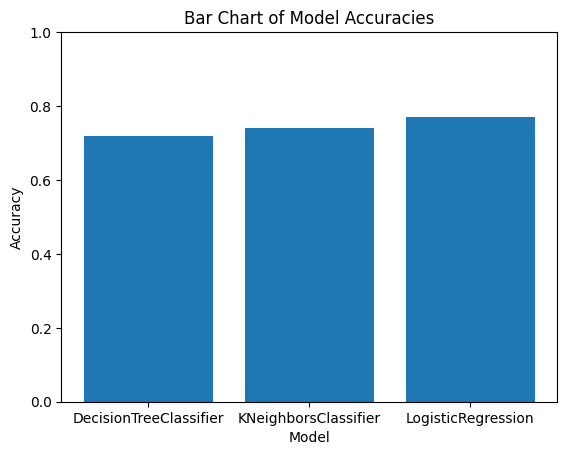

In [ ]:
# Model Selection/Comparison
labels = list(clf_accuracies.keys())
values = list(clf_accuracies.values())

plt.bar(labels, values)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Bar Chart of Model Accuracies")
plt.ylim(0, 1)  # Set y-axis limit to 1 for better visualization
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


classifiers = [DecisionTreeClassifier(random_state=7), KNeighborsClassifier(), LogisticRegression(solver = 'lbfgs')]


for model in classifiers :
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_pred,y_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"{type(model).__name__}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")

    #print(type(model).__name__)
    #print(cm)
    print('-----------------')
    print('-----------------')



DecisionTreeClassifier:
  Precision: 0.4382
  Recall: 0.4301
-----------------
-----------------
KNeighborsClassifier:
  Precision: 0.4922
  Recall: 0.3351
-----------------
-----------------
LogisticRegression:
  Precision: 0.5952
  Recall: 0.2639
-----------------
-----------------


# **KNN Confusion Matrix:**

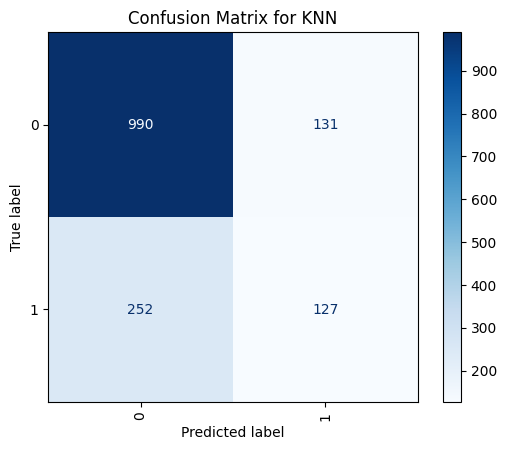

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder


knn = KNeighborsClassifier()  # Initialize the KNN classifier
knn.fit(X_train, y_train)     # Train the KNN model on the training data
knn_pred = knn.predict(X_test) # Make predictions on the test set

knn_cm = confusion_matrix(y_test, knn_pred)

# Initialize LabelEncoder if it wasn't previously
label_encoder = LabelEncoder()
label_encoder.fit(y)  # Fit the encoder to your target variable (y)


disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix for KNN')
plt.show()

# **Decision Tree Confusion Matrix:**

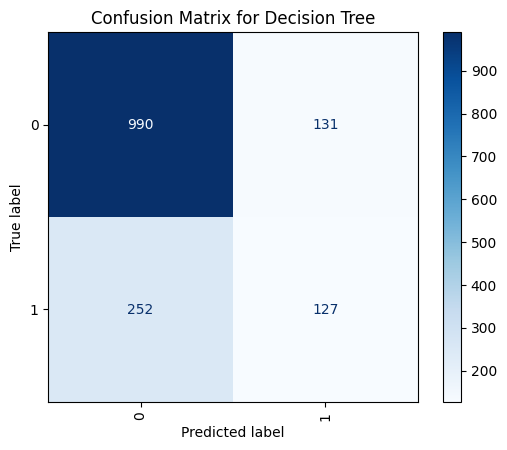

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=7)  # Initialize the Decision Tree classifier
dt.fit(X_train, y_train)     # Train the Decision Tree model on the training data
dt_pred = dt.predict(X_test) # Make predictions on the test set

dt_cm = confusion_matrix(y_test, dt_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix for Decision Tree')
plt.show()


# **Logistic Regression Confusion Matrix:**

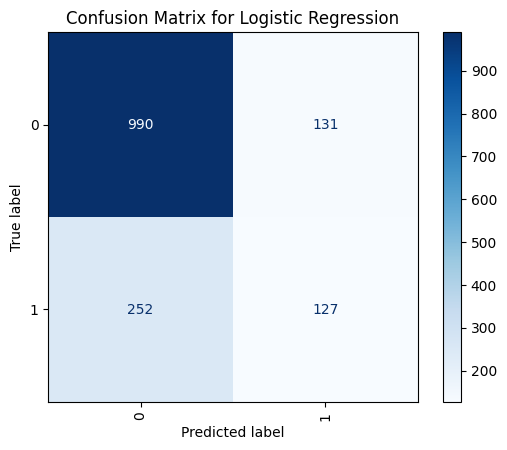

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')  # Initialize the Logistic Regression classifier
lr.fit(X_train, y_train)     # Train the Logistic Regression model on the training data
lr_pred = lr.predict(X_test) # Make predictions on the test set


lr_cm = confusion_matrix(y_test, lr_pred)



disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


# **NN**

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
# Build the neural network
input_dim = X_train.shape[1]  # Get the number of features from X_train
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the neural network with early stopping
# Assuming X_train is your original training data
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_processed = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_processed = scaler.transform(X_test)

# Compile the model with a different learning rate
optimizer = Adam(learning_rate=0.0005)  # Try a lower learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_processed, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping], # Include early stopping here
    verbose=2
)

# Evaluate the neural network
nn_accuracy = model.evaluate(X_test_processed, y_test)[1]
nn_pred_prob = model.predict(X_test_processed)
nn_pred = (nn_pred_prob > 0.5).astype(int).flatten()

# Calculate metrics for neural network
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix  # Import necessary metrics functions

nn_accuracy = accuracy_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)
nn_conf_matrix = confusion_matrix(y_test, nn_pred)


Epoch 1/50
44/44 - 2s - 40ms/step - accuracy: 0.7168 - loss: 0.6138 - val_accuracy: 0.7514 - val_loss: 0.5754
Epoch 2/50
44/44 - 0s - 4ms/step - accuracy: 0.7479 - loss: 0.5610 - val_accuracy: 0.7514 - val_loss: 0.5446
Epoch 3/50
44/44 - 0s - 5ms/step - accuracy: 0.7546 - loss: 0.5387 - val_accuracy: 0.7614 - val_loss: 0.5292
Epoch 4/50
44/44 - 0s - 6ms/step - accuracy: 0.7554 - loss: 0.5225 - val_accuracy: 0.7771 - val_loss: 0.5205
Epoch 5/50
44/44 - 0s - 4ms/step - accuracy: 0.7625 - loss: 0.5128 - val_accuracy: 0.7829 - val_loss: 0.5156
Epoch 6/50
44/44 - 0s - 5ms/step - accuracy: 0.7543 - loss: 0.5118 - val_accuracy: 0.7843 - val_loss: 0.5125
Epoch 7/50
44/44 - 0s - 7ms/step - accuracy: 0.7557 - loss: 0.5065 - val_accuracy: 0.7843 - val_loss: 0.5102
Epoch 8/50
44/44 - 0s - 7ms/step - accuracy: 0.7543 - loss: 0.5035 - val_accuracy: 0.7900 - val_loss: 0.5087
Epoch 9/50
44/44 - 0s - 4ms/step - accuracy: 0.7529 - loss: 0.4985 - val_accuracy: 0.7843 - val_loss: 0.5079
Epoch 10/50
44/44 

In [ ]:
print("\nNeural Network Results:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")


Neural Network Results:
Accuracy: 0.7820
Precision: 0.6193
Recall: 0.3562


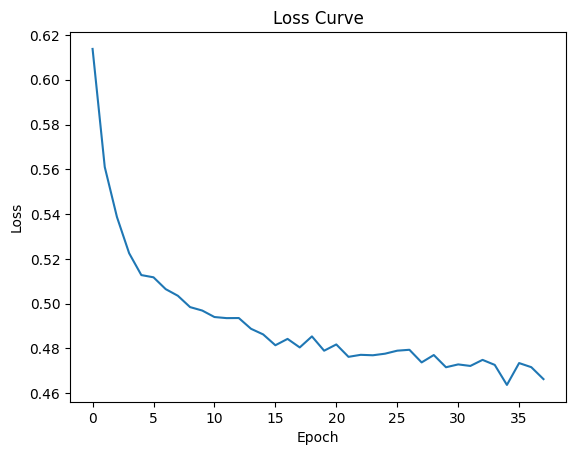

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4718
Testing Accuracy: 78.2%


In [ ]:
# Plot loss curve
plt.plot(history.history['loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Print test error
print(f"Testing Accuracy: {round(model.evaluate(X_test_processed, y_test)[1] * 100, 2)}%") # Use processed test data

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


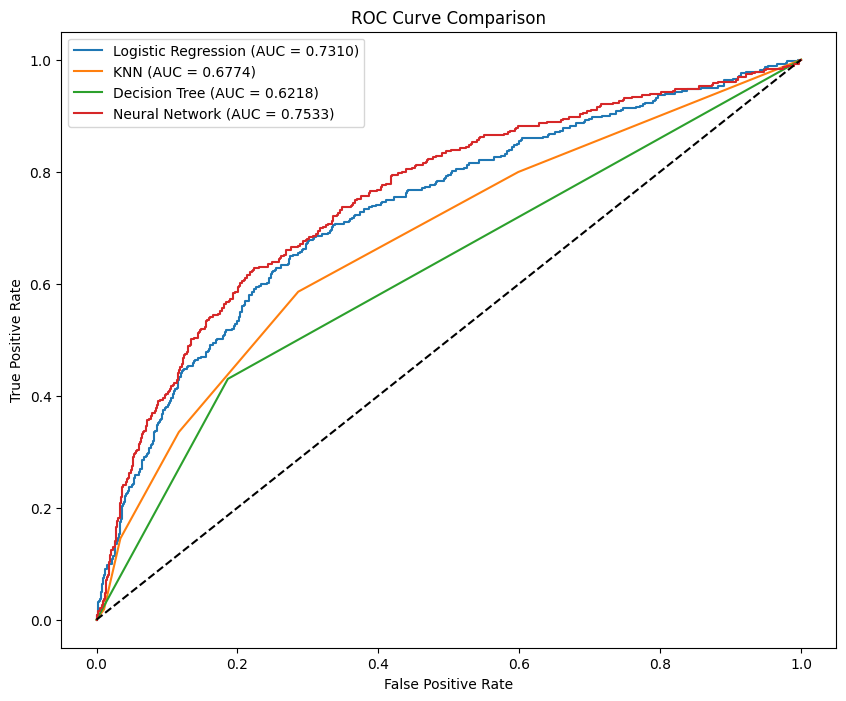

In [ ]:
!pip install scikit-learn

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Initialize a dictionary to store results
results = {}

# Calculate ROC curve and AUC for each model
for name, model in [('Logistic Regression', lr), ('KNN', knn), ('Decision Tree', dt), ('Neural Network', model)]:  # Include NN
    # Get predicted probabilities for class 1
    if name == 'Neural Network':
        y_pred_prob = model.predict(X_test_processed)  # For NN, use predict directly
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # For others, use predict_proba

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Store results
    results[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f"{name} (AUC = {result['auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()